<a href="https://colab.research.google.com/github/sohenney/2025-1_CV/blob/main/HW_2_5_2021025030_%EC%9D%B4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

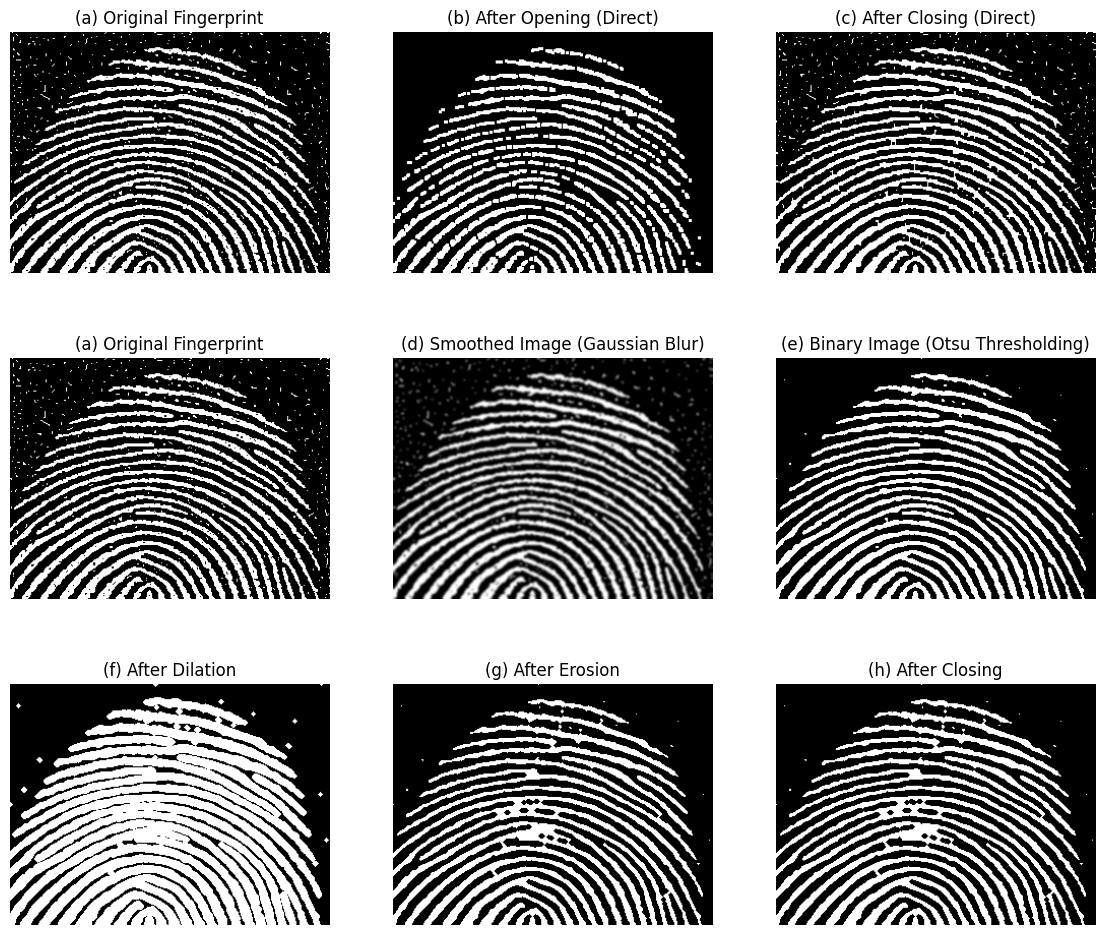

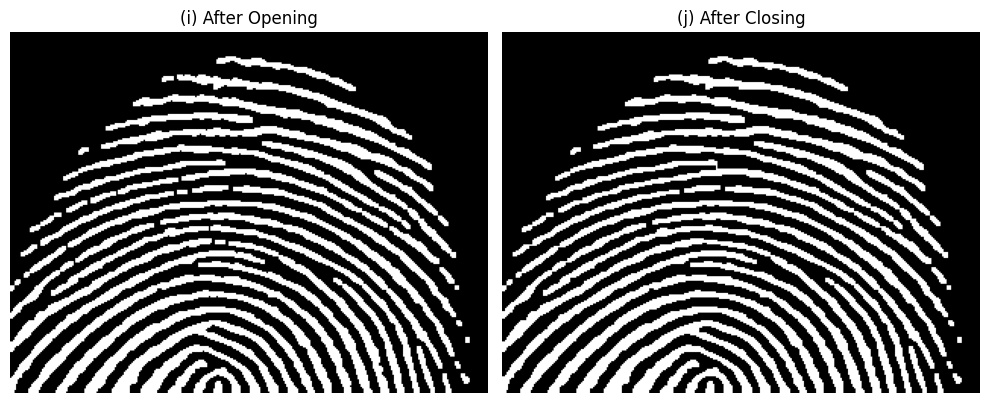

In [ ]:
import cv2  # 이미지 처리용 OpenCV 모듈
import numpy as np  # 배열 및 수치 계산을 위한 NumPy
import matplotlib.pyplot as plt  # 결과 시각화용 Matplotlib
import urllib.request  # URL에서 데이터를 가져오기 위한 라이브러리

# 이미지를 URL에서 불러오는 함수
def load_image_from_url(url):
    with urllib.request.urlopen(url) as response:
        byte_data = np.asarray(bytearray(response.read()), dtype=np.uint8)
    return cv.imdecode(byte_data, cv.IMREAD_GRAYSCALE)

# 이미지 URL
image_url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg'

# 이미지 로드
fingerprint_img = load_image_from_url(image_url)

# 이미지가 정상적으로 로드되었는지 확인
if fingerprint_img is None:
    raise ValueError(f"이미지를 불러올 수 없습니다. URL을 확인해 주세요: {image_url}")

# (수업시간 내용 적용) 원본 이미지에서 오프닝(침식 후 팽창)과 클로징(팽창 후 침식) 적용
mask_3x3 = np.ones((3, 3), np.uint8)
opening_image_direct = cv.morphologyEx(fingerprint_img, cv.MORPH_OPEN, mask_3x3)
closing_image_direct = cv.morphologyEx(fingerprint_img, cv.MORPH_CLOSE, mask_3x3)

# 이미지에 Gaussian Blur 적용하여 노이즈 감소
smoothed_image = cv.GaussianBlur(fingerprint_img, (5, 5), 0)

# Otsu 이진화 적용
_, binary_image = cv.threshold(smoothed_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# 형태학적 연산을 위한 구조 요소 정의 (5x5 크기)
structuring_element = np.uint8([[0, 0, 1, 0, 0],
                                [0, 1, 1, 1, 0],
                                [1, 1, 1, 1, 1],
                                [0, 1, 1, 1, 0],
                                [0, 0, 1, 0, 0]])

# 팽창 연산 적용
dilated_image = cv.dilate(binary_image, structuring_element, iterations=1)

# 침식 연산 적용
eroded_image = cv.erode(dilated_image, structuring_element, iterations=1)

# 닫기 연산을 통해 작은 틈을 메우고 노이즈를 제거
closed_image = cv.erode(cv.dilate(eroded_image, structuring_element, iterations=1), structuring_element, iterations=1)

# 수업에서 진행한 침식 후 팽창 (Opening)
opening_image = cv.morphologyEx(binary_image, cv.MORPH_OPEN, mask_3x3)

# 수업에서 진행한 팽창 후 침식 (Closing)
closing_image = cv.morphologyEx(opening_image, cv.MORPH_CLOSE, mask_3x3)

# 결과 시각화
plt.figure(figsize=(14, 12))

# 첫 번째 행: 원본 이미지, 다이렉트 오프닝, 다이렉트 클로징
plt.subplot(3, 3, 1)
plt.imshow(fingerprint_img, cmap='gray')
plt.title("(a) Original Fingerprint")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(opening_image_direct, cmap='gray')
plt.title("(b) After Opening (Direct)")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(closing_image_direct, cmap='gray')
plt.title("(c) After Closing (Direct)")
plt.axis('off')

# 두 번째 행: (a) 원본 이미지부터 (h) 클로징 후까지
plt.subplot(3, 3, 4)
plt.imshow(fingerprint_img, cmap='gray')
plt.title("(a) Original Fingerprint")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(smoothed_image, cmap='gray')
plt.title("(d) Smoothed Image (Gaussian Blur)")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(binary_image, cmap='gray')
plt.title("(e) Binary Image (Otsu Thresholding)")
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(dilated_image, cmap='gray')
plt.title("(f) After Dilation")
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(eroded_image, cmap='gray')
plt.title("(g) After Erosion")
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(closed_image, cmap='gray')
plt.title("(h) After Closing")
plt.axis('off')

# 세 번째 행: (g) 오프닝 후, (h) 클로징 후
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(opening_image, cmap='gray')
plt.title("(i) After Opening")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closing_image, cmap='gray')
plt.title("(j) After Closing")
plt.axis('off')

plt.tight_layout()
plt.show()


# ### 결과 분석 ###

# (a) 원본 지문 이미지:
#   원본 이미지는 지문 패턴이 존재하지만 배경에 흰 점들로 보이는 노이즈가 존재함.

# (b) 수업내용처럼 원본에 직접 오프닝(Opening) 후:
#   배경 노이즈는 사라졌지만 지문의 능선이 끊기는 현상이 발생함.

# (c) (b) 이미지에 클로징(Closing) 후:
#   능선 간 연결은 자연스러워졌지만 배경의 노이즈는 감소하지 않아 문제가 됨.


#   따라서 원본 이미지에 다음 d부터 j까지의 처리를 순차적으로 실행하여 노이즈를 완화시킴과 동시에 지문의 틈과 능선을 적절히 조정함.

# (d) Gaussian Blur 적용 후:
#   이미지에 Gaussian Blur를 적용하여 배경 노이즈를 부드럽게 제거하고 이후의 이진화에서 더 명확한 경계를 유지하도록 함.

# (e) Otsu 이진화:
#   Otsu의 이진화 방법을 사용하여 이미지의 픽셀을 명확히 두 가지 색상(흰색과 검정)으로 구분하여 배경과 지문을 분리하여 지문 능선과 배경의 경계를 선명하게 함.

# (f) 팽창(Dilation) 후:
#   팽창 연산을 통해 지문 이미지의 주요 부분을 확장시켜 지문 능선 사이의 빈 공간을 메움. 그러나 작은 잡음도 확장되어 지문이 뭉게졌기 때문에 추가적인 침식 작업이 필요함.

# (g) 침식(Erosion) 후:
#   침식 연산을 통해 과도하게 확장된 부분을 줄이고 이미지의 디테일을 더욱 명확하게 유지함. 불필요한 확장 부분이 제거되고 지문의 주요 부분만 남게 됨.

# (h) 닫기(Closing) 후:
#   닫기 연산을 적용하여 지문 능선 간 작은 틈을 메우고 남은 잡음을 최소화 하여 지문 패턴이 더욱 일관되게 보이도록 개선함.

# (i) 오프닝(Opening) 후:
#   침식 후 팽창 연산을 통해 작은 흰색 잡음(점 형태 노이즈)을 제거하고 지문 능선을 더욱 선명하게 복원함.

# (j) 클로징(Closing) 후:
#   팽창 후 침식 연산을 통해 지문 선 간의 작은 틈을 메워 지문을 깔끔해보이도록 함. 이를 통해 원본보다 노이즈는 감소하고 지문은 더욱 매끄럽고 깨끗한 형태로 복원됨.

# ### 결론 ###
# - 수업시간에 배웠던 원본 영상에 opening을 한 후 closing을 하는 기법으로는 배경의 노이즈가 잘 제거되지 않음.

# - Gaussian Blur는 배경의 노이즈를 줄여 이진화가 잘 이루어지도록 도와줌.
# - Otsu 이진화는 배경과 지문을 명확하게 구분하여 형태학적 연산이 효과적으로 진행될 수 있게 함.
# - 오프닝(침식 후 팽창)과 클로징(팽창 후 침식)은 지문 이미지에서 작은 잡음과 틈을 제거하고 지문 패턴을 깔끔하게 복원하는 데 중요한 역할을 함.